# Neural Nets
Let's start coding our neural net!

### Data

The first thing we need to do is load the data set. 

In [2]:
#import sklearn
from sklearn.datasets import load_digits
#load the digies
digits = load_digits()
images = digits['images']

We need to know what this dataset is all about before we can mess with it. Let's print it!

In [3]:
#print(digits) 
#that's a lot of data! let's just look at the keys
print(digits.keys()) #gets the keys
#what does the DESCR say?
print(digits['DESCR'])

#maybe an activity here to look at each elem of the data and figure out what it is?
print(digits['images'])

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping b

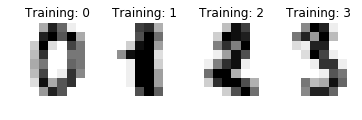

In [69]:
import matplotlib.pyplot as plt
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

### Preparing the data

When we look at the images data, we see the images are encoded as a 2D matrix of pixel darkness, on a scale from 0 to 16. 

We need to reshape the data into a means our algorithm can read (1D!). Luckily sk learn has got a simple solution for this 

In [4]:
n_samples = len(digits.images) #we need to know the size of the data
data1D = digits.images.reshape((n_samples, -1)) #so we can turn it from 2D to 1D

__Train and test__

Like we saw with every other algorithm, we need to split our data into two parts: one to train, and another to test. SK learn makes that really easy.

In [5]:
from sklearn.model_selection import train_test_split

train_image, test_image, train_target, test_target = \
    train_test_split(data1D, digits['target'])

### Classifier time!

The neural net classifier we will choose from sklearn is the MLPClassifier, that is multi-layer perception (not my little pony). 

As with all ML algorithms we've seen, the devil is in choosing the perfect parameters. When making a ANN classifier, we want to start with one hidden layer. 

In [6]:
from sklearn.neural_network import MLPClassifier
#how to even use MLPClassifier? just ask!
MLPClassifier?

In [10]:
#How would we make a mlp with 2 layers of 16 nodes each?
mlp = MLPClassifier(
    hidden_layer_sizes=(16, 16),
    batch_size=10,
    max_iter=500
)
#let's train
mlp.fit(train_image, train_target)

MLPClassifier(activation='relu', alpha=0.0001, batch_size=10, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(16, 16), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

### Predicting and evlauting our classifier

First let's generate some predictions from our classifier

In [11]:
predictions = mlp.predict(test_image) 

Now of course sk learn has some easy prewritten functions to build a classification report. Isn't it great?

In [12]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_target,predictions))

print(confusion_matrix(test_target, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.96      0.98      0.97        47
           2       1.00      1.00      1.00        36
           3       0.96      0.98      0.97        50
           4       0.98      0.96      0.97        45
           5       0.96      0.96      0.96        48
           6       1.00      1.00      1.00        44
           7       0.98      1.00      0.99        48
           8       1.00      0.96      0.98        45
           9       0.96      0.96      0.96        47

   micro avg       0.98      0.98      0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

[[40  0  0  0  0  0  0  0  0  0]
 [ 0 46  0  0  0  0  0  0  0  1]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 49  0  1  0  0  0  0]
 [ 0  1  0  0 43  0  0  0  0  1]
 [ 0  0  0  0  1 46  0  1  0  0]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0